In [1]:
import requests
import json
from bs4 import BeautifulSoup
from datetime import date
import time
import logging
import copy
import numpy as np
import re
import os

In [2]:
import sys  
sys.path.insert(1, '/home/phong/bin')
from plotting_header import *

### Get data of NUBASE 2020 from IAEA website: https://www-nds.iaea.org/relnsd/nubase/nubase_min.html

In [3]:
today = date.today()
d1 = today.strftime("%y%m%d")
outdata = requests.get('https://www-nds.iaea.org/relnsd/nubase/nubase_min.html')
# print(outdata.encoding)
outdata.encoding = 'utf-8'
m = re.search(r'var jsonData=({.*};)', outdata.text)
# print(m.group(1)[:10])
jsonData = json.dumps(m.group(1))
with open('jsconvertdata_%s.js' % d1,'w') as f:
    f.writelines(('var jsonData=%s\n') % m.group(1))
    f.writelines('var json = JSON.stringify(jsonData);\n')
    f.writelines('console.log(json);\n')

In [4]:
os.system('node jsconvertdata_%s.js > nubase2020_converted-%s.json' % (d1,d1))

0

In [5]:
#make it prettier
with open("nubase2020_converted-231117.json",'r') as f:
    outdatajson = json.loads(f.read())

with open("nubase2020_converted-prettier-231117.json", "w",encoding="utf-8") as outfile:
    json.dump(outdatajson,outfile,indent=2,ensure_ascii=False)

In [6]:
# read again
with open("nubase2020_converted-prettier-231117.json",'r') as f:
    outdatajson = json.loads(f.read())

In [7]:
###
#n.replaceAll("us", "&mu;s").replaceAll("gt", "&gt;").replaceAll("lt", "&lt;"
#b.replace("u003d", "=").replace("GT", "&gt; ").replace("LT", "&lt; ")
#time unit
year_to_s = 31556926.
ftoSeconds = {"Yy":year_to_s*1e24,"Zy":year_to_s*1e21,"Ey":year_to_s*1e18,"Py":year_to_s*1e15,"Ty":year_to_s*1e12,
     "Gy":year_to_s*1e9,"My":year_to_s*1e6,"ky":year_to_s*1e3,
     "y":year_to_s,"d":24*3600,"h":3600.,"m":60.,"s":1.,
    "ms":1e-3,"us":1e-3,"ns":1e-9,"ps":1e-12,"fs":1e-15,"as":1e-18,"zs":1e-21,"ys":1e-24}

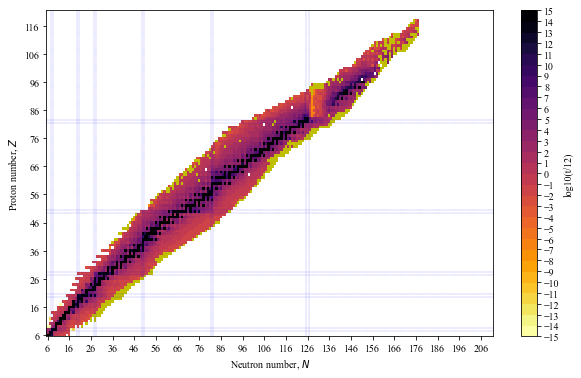

In [31]:
%matplotlib inline
Zlim = [5.5,121.5]
Nlim = [5.5,211.5]
NZstep = [10,10]
fig,axis = plt.subplots()
fig.set_size_inches(10,6)
fig.subplots_adjust(hspace=0,wspace=0)
plot_base(axis,Nlim,Zlim,NZstep)

bounds = np.arange(-15,16,1)
cmap,sm,norm = getcmap(bounds,"inferno_r")

for i in outdatajson["nucs"]:
    if (i["h"] == "stable"):
        axis.add_patch(drawbox(float(i["n"]),float(i["z"]),fcolor='k',ecolor='None',falpha = 1))
    else:
        hl = i["h"].split()
        if (len(hl)==3 and i["h"].find("#")==-1):
            val = float(hl[0])*ftoSeconds.get(hl[1])
            axis.add_patch(drawbox(float(i["n"]),float(i["z"]),fcolor=cmap(norm(np.log10(val))),ecolor='None',falpha = 1))
        elif (i["h"].find("#")>-1):
            axis.add_patch(drawbox(float(i["n"]),float(i["z"]),fcolor='y',ecolor='None',falpha = 1))
cbar = fig.colorbar(sm, ticks=bounds, label="log10(t/12)", aspect=20, orientation='vertical', ax=axis)
